In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'/content/heart_disease_uci.csv')

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [8]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
df.nunique()

,0
id,920
age,50
sex,2
dataset,4
cp,4
trestbps,61
chol,217
fbs,2
restecg,3
thalch,119


<Axes: xlabel='sex', ylabel='Count'>

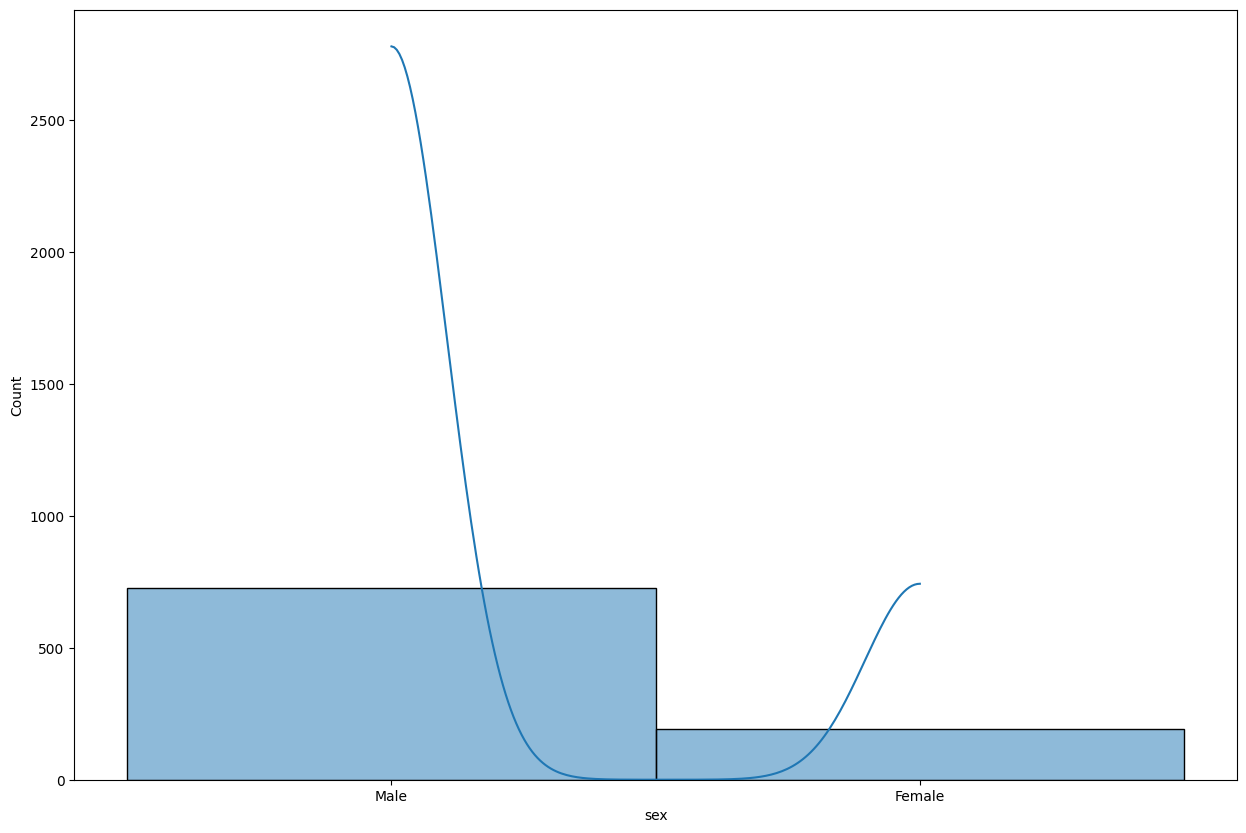

In [10]:
plt.figure(figsize=(15,10))
sns.histplot(df['sex'],kde=True)

<Axes: xlabel='age', ylabel='Count'>

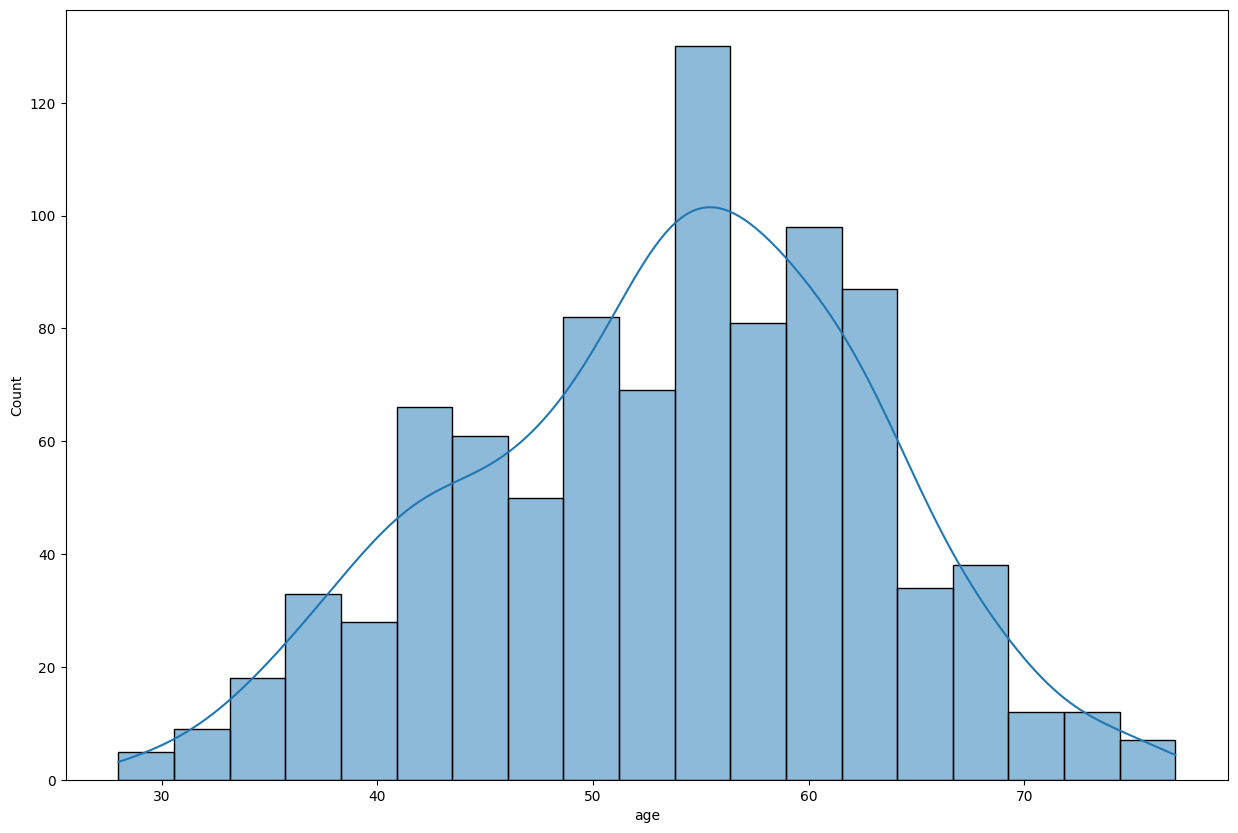

In [11]:
plt.figure(figsize=(15,10))
sns.histplot(df['age'],kde=True)

<Axes: xlabel='cp', ylabel='Count'>

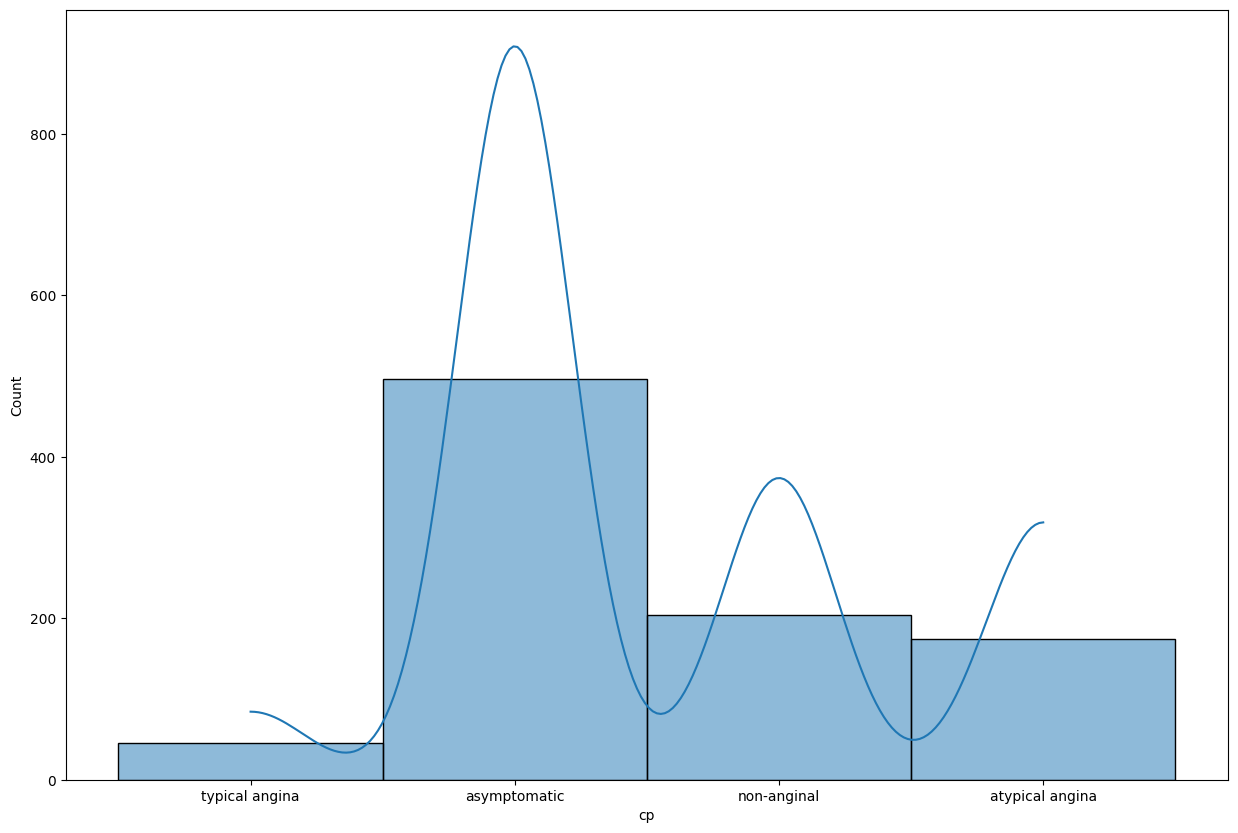

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(df['cp'],kde=True)

In [13]:
df = df.drop(columns=['id','dataset'], axis=1)

In [14]:
numCol = ["age", "trestbps", "chol", "thalch", "oldpeak", "ca"]
catCol = ["sex", "cp", "restecg", "slope", "thal"]
boolCol = ["fbs", "exang"]

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_bool = SimpleImputer(strategy='most_frequent')

df[numCol] = imputer_num.fit_transform(df[numCol])
df[catCol] = imputer_cat.fit_transform(df[catCol])
df[boolCol] = imputer_bool.fit_transform(df[boolCol])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67.0,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67.0,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37.0,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41.0,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [15]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [16]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df.head()


,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63.0,145.0,233.0,150.0,2.3,0.0,0,True,False,False,True,True,False,False,False,False,False,False,False
1,67.0,160.0,286.0,108.0,1.5,3.0,2,True,False,False,False,False,False,False,True,True,False,True,False
2,67.0,120.0,229.0,129.0,2.6,2.0,1,True,False,False,False,False,False,False,True,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0.0,0,True,False,True,False,False,True,False,False,False,False,True,False
4,41.0,130.0,204.0,172.0,1.4,0.0,0,False,True,False,False,False,False,False,False,False,True,True,False


In [17]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('num', axis=1)
y = df['num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
scaler = StandardScaler()
X_train[numCol] = scaler.fit_transform(X_train[numCol])
X_test[numCol] = scaler.transform(X_test[numCol])
X_train.head()


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
880,0.902413,-0.083946,-0.262575,-0.694187,1.983624,-0.36137,True,False,False,False,False,False,True,True,True,False,True,False
457,0.034776,0.987771,0.223659,-0.614999,-0.794406,-0.36137,True,False,True,False,False,True,False,False,True,False,True,False
797,-0.290587,-0.083946,1.287871,0.097694,-0.331401,-0.36137,True,False,True,False,False,True,False,False,True,False,True,False
25,-0.399042,-0.619805,0.186962,0.810387,0.687210,-0.36137,False,False,True,False,False,True,False,False,True,False,True,False
84,-0.182133,-0.619805,1.159431,1.364703,-0.609204,-0.36137,True,True,False,False,False,True,False,False,False,True,True,False


<Axes: >

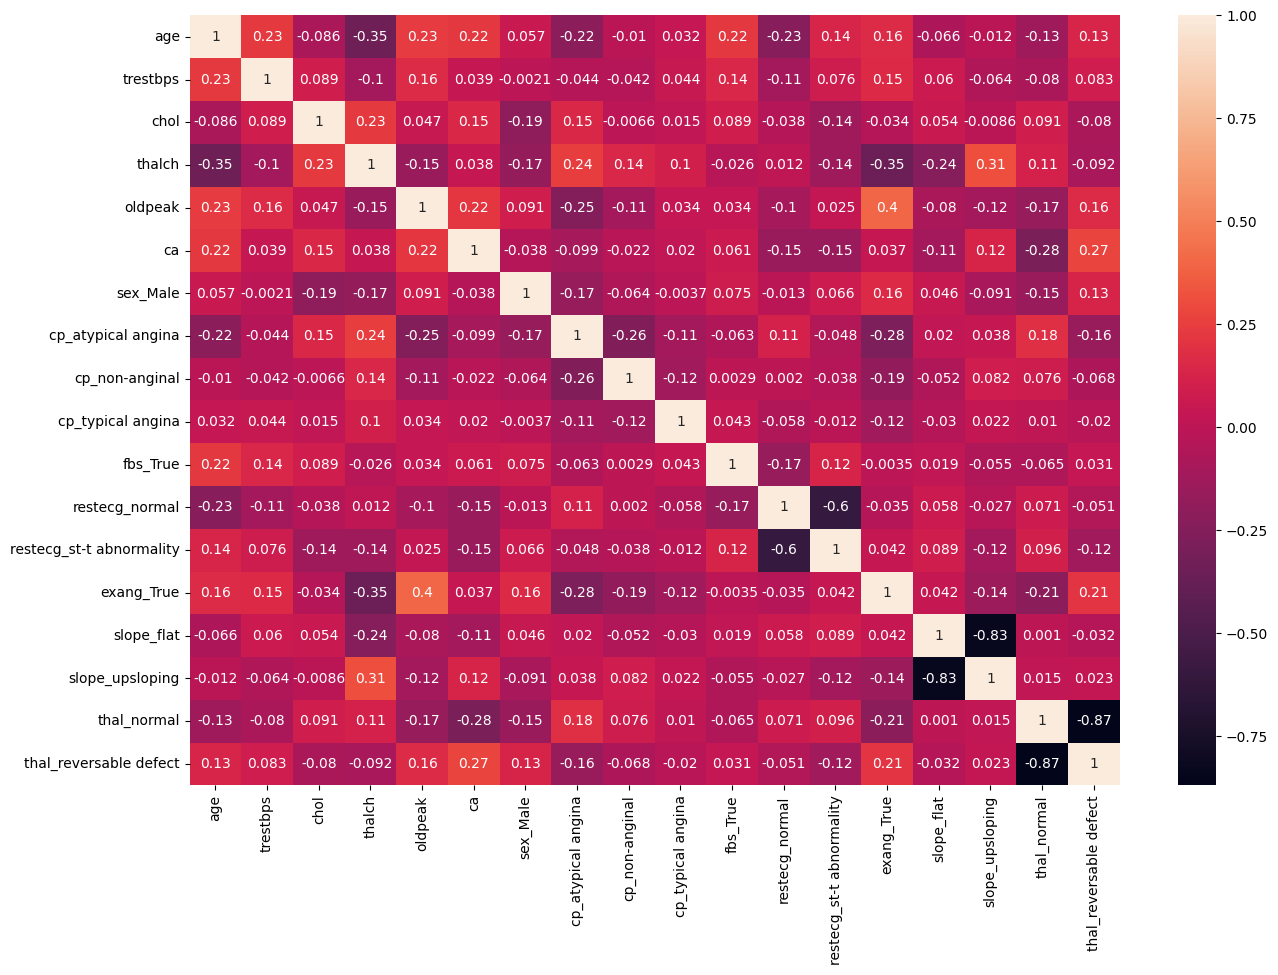

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)
#

In [20]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)